In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [47]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [50]:
df_dummies = df.copy()

In [51]:
df_dummies

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
df_dummies['sex'] = df_dummies['sex'].apply({'male' :0, 'female' :1}.get)
df_dummies['smoker'] = df_dummies['smoker'].apply({'yes' :1, 'no' :0}.get)
df_dummies['region'] = df_dummies['region'].apply({'southwest' :1, 'southeast' :2, 'northwest' :3 , 'northeast' :4}.get)

In [53]:
df_dummies.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [54]:
X = df_dummies.drop(['charges'], axis=1)
y = df_dummies.charges

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_shape (936, 6)
X_test_shape (402, 6)
y_train_shape (936,)
y_test_shape (402,)


In [56]:
lin_reg = LinearRegression()

In [57]:
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_test)

In [58]:
train_score = lin_reg.score(X_train, y_train)

In [59]:
print("R2 score :", (r2_score(y_test, pred)))
print("Train score :", train_score)
print("Mean abslotute Error :", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_absolute_error(y_test, pred)))

R2 score : 0.7694415927057693
Train score : 0.7422571320172101
Mean abslotute Error : 4155.239843059381
Mean Squared Error : 33805466.89868861
Root Mean Squared Error : 64.46114987385333


In [60]:
df_set = pd.DataFrame({'Real_Cost': y_test, 'Predict_Cost': pred, 'Variance': y_test-pred})


In [61]:
df_set.head(30)

,Real_Cost,Predict_Cost,Variance
764,9095.06825,8931.421164,163.647086
887,5272.17580,7070.906703,-1798.730903
890,29330.98315,36937.080496,-7606.097346
1293,9301.89355,9596.992144,-295.098594
259,33750.29180,27008.354871,6741.936929
1312,4536.25900,10866.484854,-6330.225854
899,2117.33885,37.461022,2079.877828
752,14210.53595,17222.809204,-3012.273254
1286,3732.62510,918.308115,2814.316985
707,10264.44210,11396.553740,-1132.111640


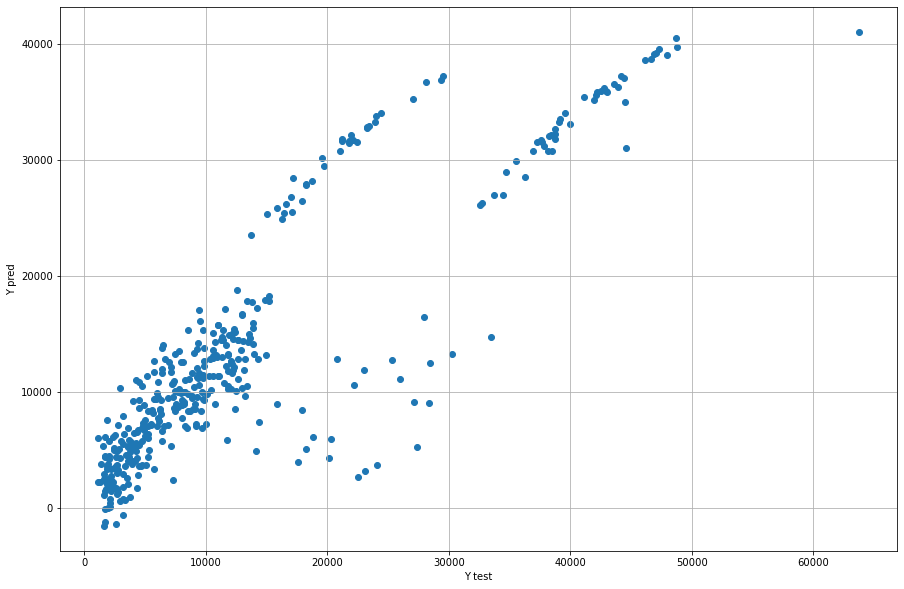

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.grid()
plt.show;

In [63]:
df_dummies.head(11)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [66]:
lin_reg.predict([[25,0,26.220,0,0,4]]) #sprawdzenie dla 10 wiersza 

c:\Users\karl1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3319.86357954])